<a href="https://colab.research.google.com/github/VINY1958/polars/blob/main/IIThe_Polar_Express_Cheatsheet___polars_%F0%9F%90%BB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Polars](https://www.pola.rs/) Cheat Sheet

[![Polars cheat sheet: download as PDF](https://img.shields.io/badge/Polars%20cheat%20sheet-Download%20as%20PDF-green)](https://franzdiebold.github.io/polars-cheat-sheet/Polars_cheat_sheet.pdf)

Most examples were taken from the official [Polars user guide](https://pola-rs.github.io/polars-book/user-guide/).

By Franz Diebold ([diebold.io](https://www.diebold.io)), inspired by [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

### Install

In [1]:
!pip install polars

### Import

In [2]:
import polars as pl

### Creating/reading DataFrames

In [3]:
# Create DataFrame
df = pl.DataFrame(
    {
        "nrs": [1, 2, 3, None, 5],
        "names": ["foo", "ham", "spam", "egg", None],
        "random": [0.3, 0.7, 0.1, 0.9, 0.6],
        "groups": ["A", "A", "B", "C", "B"],
    }
)

In [4]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [5]:


# Read CSV using the raw data URL
df1 = pl.read_csv("https://raw.githubusercontent.com/VINY1958/datasets/main/iris.csv", has_header=True)

In [6]:
df1

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Virginica"""
6.3,2.5,5.0,1.9,"""Virginica"""
6.5,3.0,5.2,2.0,"""Virginica"""


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##lectura 32

con la api lazy polars no ejecuta la consulta linea por linea, api lazy permite aplicar optimizador de consulta
conjunto de datos mas grandes de la memoria
puede ayudarnos a optimizar los resultados

In [8]:
df1 = pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')

In [10]:
df1.select()

In [11]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .with_columns(
      pl.col('AIR_TIME')/ 60
    )
    .filter(pl.col('MONTH')> 10)

)

In [12]:
query

In [13]:
query.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,11,1,7,"""NK""",612,"""N602NK""","""LAS""","""MSP""",5,7,2,17,24,177,177,2.566667,1299,358,6,402,404,2,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",680,"""N76516""","""SFO""","""ORD""",14,19,5,15,34,258,231,3.516667,1846,505,5,532,510,-22,0,0,null,null,null,null,null,null
2015,11,1,7,"""AA""",260,"""N3KTAA""","""LAX""","""MIA""",15,6,-9,30,36,296,313,4.5,2342,706,13,711,719,8,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",910,"""N76503""","""LAX""","""ORD""",31,27,-4,14,41,248,231,3.516667,1744,512,6,539,518,-21,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",1888,null,"""LAS""","""IAH""",41,null,null,null,null,172,null,null,1222,null,null,433,null,null,0,1,"""A""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,4.533333,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,3.25,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,3.283333,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


###forma alternativa de acceder a la api lazy de polars

In [14]:
df2 = pl.DataFrame(
  {
        'id':[1,2,3],
        'nombre':['Rosa','Jose','Pedro']
    }

)

In [15]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [16]:
df2_lazy = df2.lazy()

In [18]:
print(df2_lazy) ## la consulta del lazy frame establece los nombres de las columnas y los tipos de datos

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

DF ["id", "nombre"]; PROJECT */2 COLUMNS; SELECTION: None


In [21]:
df2_lazy.explain(optimized=True)

'DF ["id", "nombre"]; PROJECT */2 COLUMNS; SELECTION: None'

In [23]:
df2_lazy

##podemos ver el dataframe lazy con el metodo schema, .schema
comprobacion de los tipos de datos del lazy frame
en la api lazy polars comprobara el dataframe antes de comprobar los datos
la verificacion se realiza al verificar la consulta lazy

In [25]:
df2.schema

Schema([('id', Int64), ('nombre', String)])

In [26]:
df2_lazy.schema

<ipython-input-26-a3c065f6a69b>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df2_lazy.schema


Schema([('id', Int64), ('nombre', String)])

In [27]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [28]:
df2_lazy.with_columns(pl.col('id').round(0)).collect()

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


en la api lazy se debe conocer el esquema el optimizador de consulta podra inferir , si el esquema no se conoce de antemano no se hace , ejemplo pivot
pivot NO ESTA DISPOPNIBLE EN API lazy

ejecutar el pipeline en modo lazy
ejecutar el pipeline con .collect
hacer la operacion que no sea lazy en el dataframe
Convertir la salida nuevamente en a unlazy Frame y continuar en modo lazy

In [56]:
df3 = pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')
df3

In [59]:
df3.collect().head(3)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"


lazy_eager_query =(
    pl.scan_parquet('/content/vuelos.parquet')
    .with_columns(pl.col('AIR_TIME')/ 60)
.collect()
.pivot(
        index='AIRLINE',columns='MONTH', values='AIR_TIME',aggfunc='mean'
)

.lazy()
    .filter(pl.col('AIRLINE')=='AA')
    .collect()
    )

In [58]:
df3.columns

<ipython-input-58-5354ac78f1f0>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df3.columns


['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [63]:
lazy_eager_query =(
    pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')
    .with_columns(pl.col('views')> 100000)
.collect()
.pivot(
        index='video_id',columns='likes', values='likes',aggregate_function='mean'
))

<ipython-input-63-b91b887ff27b>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')


In [81]:
lazy_eager_query

video_id,57527,97185,146033,10172,132235,9763,15993,23663,3543,12654,655,1576,114188,7848,7473,9419,8011,5398,11963,8421,9586,3585,11758,1707,4884,8676,4687,9033,156,715,4035,119,787419,3781,1661,2486,…,56557,455949,181069,90500,15128,77408,230427,140462,75642,162795,105783,41623,634770,518106,28479,6583,50919,835657,129865,46673,20248,48889,196635,19930,189265,109945,266267,628861,210802,45128,676467,645888,38160,60008,48068,192957,357079
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2kyS6SvSYSE""",57527.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1ZAPwfrtAFY""",null,97185.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""5qpjK5DgCt4""",null,null,146033.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""puqaWrEC7tY""",null,null,null,10172.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""d380meD0W0M""",null,null,null,null,132235.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""dS5Thrl-4Kc""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""JGm9Y_hFqNk""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""6h8QgZF5Qu4""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [67]:
df3.collect()

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""puqaWrEC7tY""","""17.14.11""","""Nickelback Lyrics: Real or Fak…","""Good Mythical Morning""",24,"""2017-11-13T11:00:04.000Z""","""rhett and link|gmm|good mythic…",343168,10172,666,2146,"""https://i.ytimg.com/vi/puqaWrE…",false,false,false,"""Today we find out if Link is a…"
"""d380meD0W0M""","""17.14.11""","""I Dare You: GOING BALD!?""","""nigahiga""",24,"""2017-11-12T18:01:41.000Z""","""ryan|higa|higatv|nigahiga|i da…",2095731,132235,1989,17518,"""https://i.ytimg.com/vi/d380meD…",false,false,false,"""I know it's been a while since…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BZt0qjTWNhw""","""18.14.06""","""The Cat Who Caught the Laser""","""AaronsAnimals""",15,"""2018-05-18T13:00:04.000Z""","""aarons animals|aarons|animals|…",1685609,38160,1385,2657,"""https://i.ytimg.com/vi/BZt0qjT…",false,false,false,"""The Cat Who Caught the Laser -…"
"""1h7KV2sjUWY""","""18.14.06""","""True Facts : Ant Mutualism""","""zefrank1""",22,"""2018-05-18T01:00:06.000Z""","""[none]""",1064798,60008,382,3936,"""https://i.ytimg.com/vi/1h7KV2s…",false,false,false,""""""
"""D6Oy4LfoqsU""","""18.14.06""","""I GAVE SAFIYA NYGAARD A PERFEC…","""Brad Mondo""",24,"""2018-05-18T17:34:22.000Z""","""I gave safiya nygaard a perfec…",1066451,48068,1032,3992,"""https://i.ytimg.com/vi/D6Oy4Lf…",false,false,false,"""I had so much fun transforming…"


### filtro desastrosos jajajaja

In [75]:
df3.lazy()\
    .filter(pl.col('channel_title')=='Rudy Mancuso')\
    .collect()

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.15.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4326684,167696,6730,9265,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.16.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4576001,172379,6952,9440,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.17.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4737269,175762,7017,9557,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.18.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4949674,180201,7042,9687,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""oLDbO545aKQ""","""18.10.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3756259,195392,4479,11143,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"
"""oLDbO545aKQ""","""18.11.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3766328,195543,4483,11157,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"
"""oLDbO545aKQ""","""18.12.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3787506,195963,4492,11180,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"


### LECTURA 33

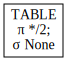

In [77]:
df2_lazy.show_graph(optimized=True)

###se lee de abajo hacia arriba, ejemplor cada rectangulo correponde a una etapa del plan de consulta
el simbolo,sigma significa a seleccion
el simbolo pi proyeccion de un conjunto de columnas

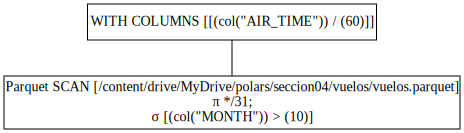

In [78]:
query.show_graph()

# **alternativa de visualizacion del plan de consulta**

In [83]:
query

In [79]:
query.explain(optimized=True)

' WITH_COLUMNS:\n [[(col("AIR_TIME")) / (60)]] \n  Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n  PROJECT */31 COLUMNS\n  SELECTION: [(col("MONTH")) > (10)]'

In [80]:
query.explain(optimized=False)

'FILTER [(col("MONTH")) > (10)] FROM\n   WITH_COLUMNS:\n   [[(col("AIR_TIME")) / (60)]] \n    Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n    PROJECT */31 COLUMNS'

In [84]:
query.explain()

' WITH_COLUMNS:\n [[(col("AIR_TIME")) / (60)]] \n  Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n  PROJECT */31 COLUMNS\n  SELECTION: [(col("MONTH")) > (10)]'

##nos brinda el mejor resultado posible

In [85]:
query.collect()## consulta en el dataset completo 2,4 que coinciden con el resultado

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,11,1,7,"""NK""",612,"""N602NK""","""LAS""","""MSP""",5,7,2,17,24,177,177,2.566667,1299,358,6,402,404,2,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",680,"""N76516""","""SFO""","""ORD""",14,19,5,15,34,258,231,3.516667,1846,505,5,532,510,-22,0,0,null,null,null,null,null,null
2015,11,1,7,"""AA""",260,"""N3KTAA""","""LAX""","""MIA""",15,6,-9,30,36,296,313,4.5,2342,706,13,711,719,8,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",910,"""N76503""","""LAX""","""ORD""",31,27,-4,14,41,248,231,3.516667,1744,512,6,539,518,-21,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",1888,null,"""LAS""","""IAH""",41,null,null,null,null,172,null,null,1222,null,null,433,null,null,0,1,"""A""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,4.533333,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,3.25,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,3.283333,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


los lazy frame son planes de consulta una promesa de calculo, utilicemos despues se va a calcular de nuevo en ese plan de consulta
si se necesita mas memoria de la que se necesita se aplica el modo streaming=True habilitamos ese modo
LA API LAZY no cuenta cuantas columnas hay en cada etapa de la consulta

In [86]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .filter(pl.col('AIR_TIME')>100)
)
query.fetch(n_rows=20)  ## 20 filas de esta consulta

<ipython-input-86-b18d1a6b52aa>:5: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query.fetch(n_rows=20)  ## 20 filas de esta consulta


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,1,1,4,"""AS""",108,"""N309AS""","""ANC""","""SEA""",45,41,-4,17,58,204,194,173,1448,451,4,509,455,-14,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",1560,"""N3743H""","""ANC""","""SEA""",45,31,-14,25,56,210,200,171,1448,447,4,515,451,-24,0,0,null,null,null,null,null,null
2015,1,1,4,"""UA""",1197,"""N78448""","""SFO""","""IAH""",48,42,-6,11,53,218,217,199,1635,612,7,626,619,-7,0,0,null,null,null,null,null,null


## LECTURA 34

LAZY FRAME AGREGACIONES

In [87]:
import polars as pl
from polars import col

In [88]:
path = ('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')

In [101]:
df

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [102]:
df1

In [103]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [107]:
df3.collect().head(2)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"


In [108]:
df3.columns

<ipython-input-108-5354ac78f1f0>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df3.columns


['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [110]:
df1.collect().head(3)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null


In [111]:
df.lazy()

In [112]:
df1.lazy()

In [117]:
df2.lazy()

In [118]:
df3.lazy()

In [119]:
df4.lazy()

In [90]:
lf = pl.LazyFrame(
    {
        'id': [1,2,3],
        'nombre':['juan','pedro','maria']
    }
)


In [91]:
lf

In [92]:
lf.collect()

id,nombre
i64,str
1,"""juan"""
2,"""pedro"""
3,"""maria"""


In [94]:
df4 = pl.read_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
df4

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [95]:
df.columns

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [124]:
df5 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'null', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,None], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, None, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,None, 500] # Change 'null' to None for missing values
    }
)

In [96]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .select(
        col('AIRLINE_DELAY'),
        col('SECURITY_DELAY'),
        col('WEATHER_DELAY'), #Fixed typo in column name
    )
    .null_count()  ### recuento de valores nulos de cada columna
)
query.collect()

AIRLINE_DELAY,SECURITY_DELAY,WEATHER_DELAY
u32,u32,u32
4755640,4755640,4755640


In [97]:
vuelos_lf =(
    pl.scan_parquet(path)
    .select(
     col('AIR_TIME'),
     col('DISTANCE')
)
)
vuelos_lf.sum().collect()  ## suma de los valores de cada columna

AIR_TIME,DISTANCE
i32,i32
648606351,490390113


In [126]:
df5.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""null""",32,null,400
5,"""juana""",33,4000,null
6,"""oscar""",null,5000,500


In [129]:
df5 = (
    df5 # Using the existing LazyFrame
    .select(
     pl.col('edad'),
     pl.col('aportes')
    )
)
df5.sum().collect()  ## suma de los valores de cada columna

edad,aportes
i64,i64
140,1500


In [130]:
df5.max().collect()

edad,aportes
i64,i64
33,500


In [131]:
df5.mean().collect()

edad,aportes
f64,f64
28.0,300.0


In [132]:
df5.mean().collect()

edad,aportes
f64,f64
28.0,300.0


In [98]:
vuelos_lf.max().collect()

AIR_TIME,DISTANCE
i32,i32
690,4983


In [99]:
vuelos_lf.mean().collect()

AIR_TIME,DISTANCE
f64,f64
113.511628,822.356495


In [100]:
vuelos_lf.min().collect()

AIR_TIME,DISTANCE
i32,i32
7,21


In [136]:
df5.collect()

edad,aportes
i64,i64
20,100
25,200
30,300
32,400
33,null
null,500


In [137]:
df5 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'null', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,None], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, None, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,None, 500] # Change 'null' to None for missing values
    }
)

In [138]:
df5.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""null""",32,null,400
5,"""juana""",33,4000,null
6,"""oscar""",null,5000,500


In [145]:
df5 = (
    df5 # Using the existing LazyFrame
    .select(
     pl.col('nombre').fill_null(strategy='backward'),
     pl.col('aportes').fill_null(strategy='forward'),
     pl.col('ingreso').fill_null(strategy='mean'),
     pl.col('edad').fill_null(strategy='forward')
    )
)



In [146]:
df5.collect()

nombre,aportes,ingreso,edad
str,str,str,str
"""Rosa""","""100""","""1000""","""20"""
"""Jose""","""200""","""2000""","""25"""
"""Pedro""","""300""","""3000""","""30"""
"""null""","""400""","""mean""","""32"""
"""juana""","""forward_fill""","""4000""","""33"""
"""oscar""","""500""","""5000""","""median"""


In [148]:
df5.fill_null(strategy='forward').collect()

nombre,aportes,ingreso,edad
str,str,str,str
"""Rosa""","""100""","""1000""","""20"""
"""Jose""","""200""","""2000""","""25"""
"""Pedro""","""300""","""3000""","""30"""
"""null""","""400""","""mean""","""32"""
"""juana""","""forward_fill""","""4000""","""33"""
"""oscar""","""500""","""5000""","""median"""


In [159]:
df5 = df5.select(pl.all().forward_fill())
df5

nombre,aportes,ingreso,edad
str,str,str,str
"""Rosa""","""100""","""1000""","""20"""
"""Jose""","""200""","""2000""","""25"""
"""Pedro""","""300""","""3000""","""30"""
"""null""","""400""","""mean""","""32"""
"""juana""","""forward_fill""","""4000""","""33"""
"""oscar""","""500""","""5000""","""median"""


In [166]:
for column in df5.columns:
    df5 = df5.with_columns(
        pl.col(column).fill_nan(pl.col(column).mean()).alias(column)
    )

<ipython-input-166-b3430ee7e69e>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  for column in df5.columns:
